<a href="https://colab.research.google.com/github/oviccenzo/trabalho-de-analise-de-algoritmo/blob/main/trabalho_analise_de_algoritmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Gerando instância aleatória n=10
  Testando bubble ... 9.629000032873591e-06 s
  Testando selection ... 6.906000010076241e-06 s
  Testando insertion ... 6.59900001664937e-06 s
  Testando merge ... 1.614900003232833e-05 s
  Testando quick ... 1.667699996232841e-05 s
  Testando heap ... 1.2497999989591335e-05 s
  Testando shell ... 6.499000051007897e-06 s
  Testando timsort ... 1.471000018682389e-06 s

Gerando instância aleatória n=100
  Testando bubble ... 0.0007950990000153979 s
  Testando selection ... 0.00034645599998839316 s
  Testando insertion ... 0.00031567199999926743 s
  Testando merge ... 0.0002976490000037302 s
  Testando quick ... 0.00022344399997109576 s
  Testando heap ... 0.0002574920000029124 s
  Testando shell ... 0.0001329990000158432 s
  Testando timsort ... 7.153000012749544e-06 s

Gerando instância aleatória n=1000
  Testando bubble ... 0.0501097320000099 s
  Testando selection ...

usage: colab_kernel_launcher.py [-h] [--out OUT_DIR] [--repeats REPEATS]
                                [--skip-quadratic-above SKIP_QUAD]
                                [--sizes SIZES] [--no-plot]
colab_kernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-ca7fc068-28f0-4a54-aaf8-5cea0e89dd2f.json


 0.025047259999951166 s
  Testando insertion ... 0.022903120999956172 s
  Testando merge ... 0.002072761000022183 s
  Testando quick ... 0.0017195949999972981 s
  Testando heap ... 0.0026433649999830777 s
  Testando shell ... 0.0015730980000512318 s
  Testando timsort ... 0.00010878500000899294 s

Gerando instância aleatória n=5000
  Testando bubble ... 1.3981361829999628 s
  Testando selection ... 0.9752844029999892 s
  Testando insertion ... 0.62185494900001 s
  Testando merge ... 0.013009436999993795 s
  Testando quick ... 0.009506344000044464 s
  Testando heap ... 0.015258447000007891 s
  Testando shell ... 0.014531040999997913 s
  Testando timsort ... 0.0007869429999800559 s

Gerando instância aleatória n=10000
  Testando bubble ... 5.6743587249999905 s
  Testando selection ... 2.550199988999964 s
  Testando insertion ... 2.5034856659999605 s
  Testando merge ... 0.04726595699997915 s
  Testando quick ... 0.03610997800001314 s
  Testando heap ... 0.06266647700005024 s
  Testando s

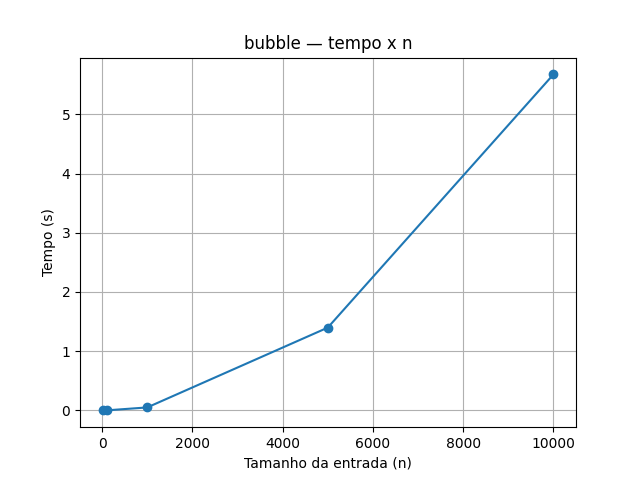

  Exibindo: merge_time.png


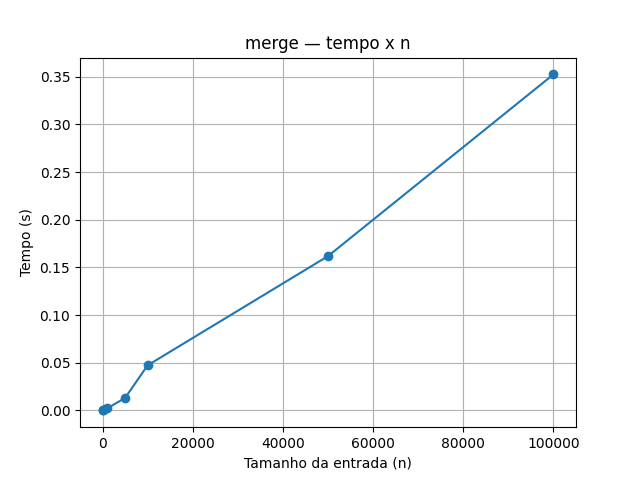

  Exibindo: quick_time.png


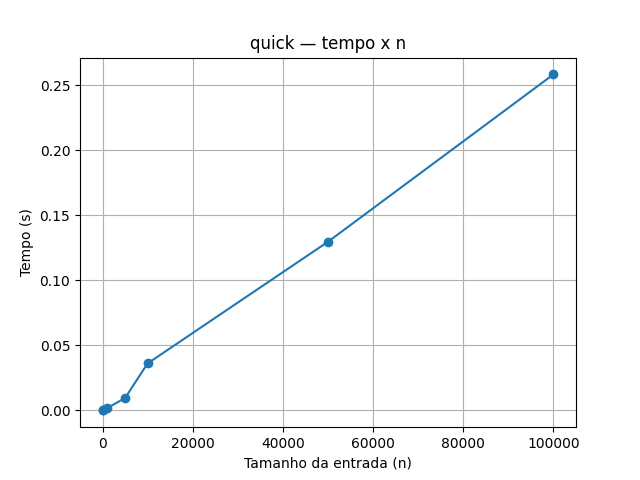

  Exibindo: comparativo_time_log.png


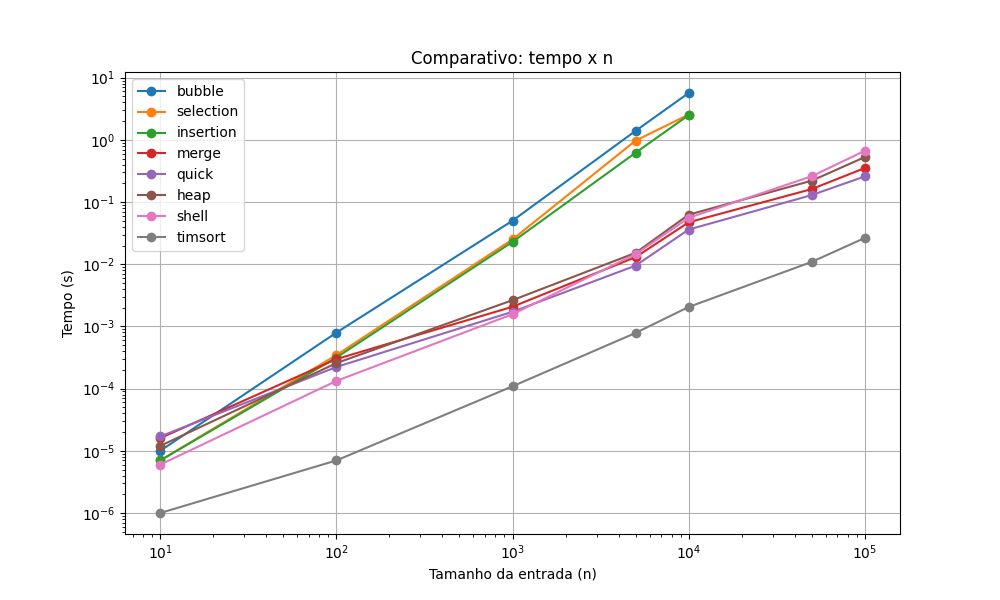

  Exibindo: timsort_time.png


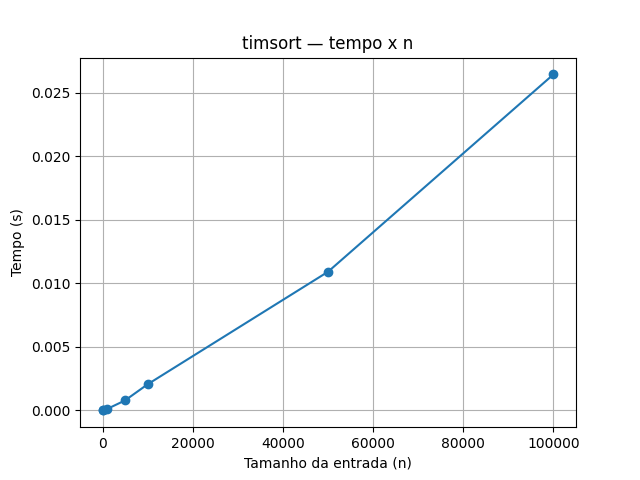

  Exibindo: heap_time.png


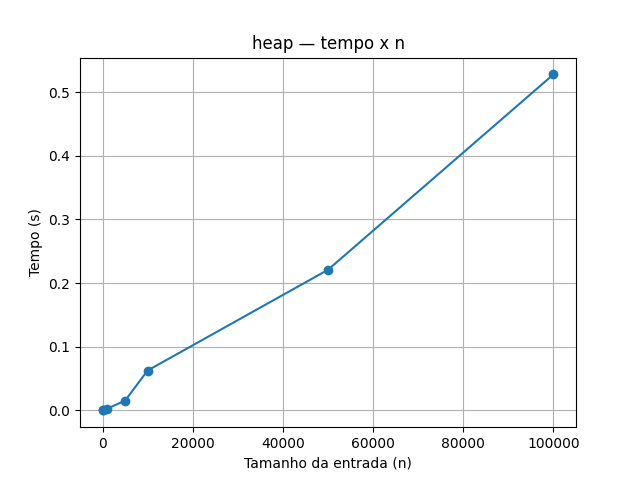

  Exibindo: comparativo_time.png


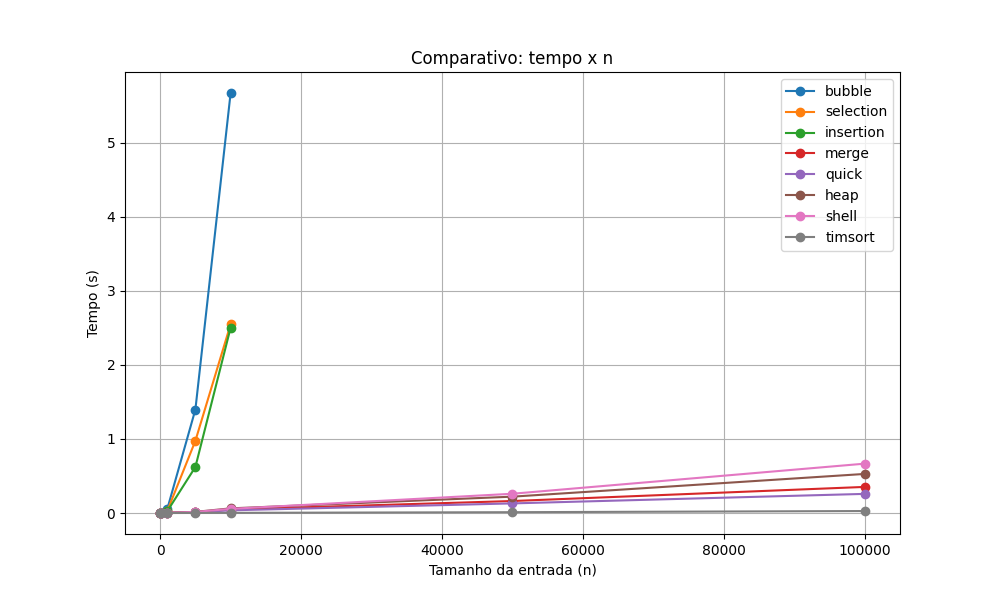

  Exibindo: insertion_time.png


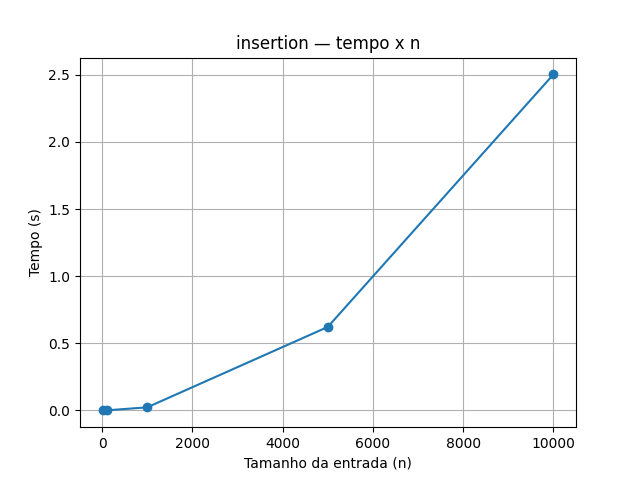

  Exibindo: selection_time.png


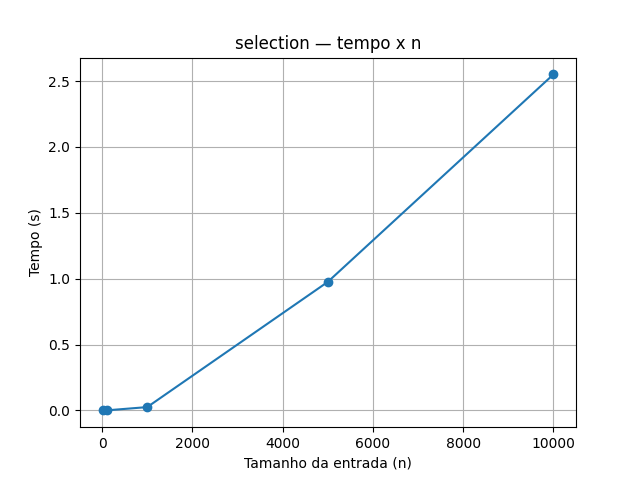

  Exibindo: shell_time.png


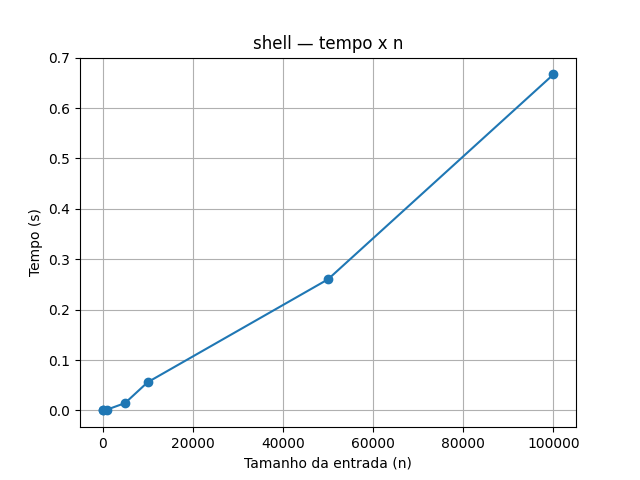


Execução finalizada. Confira o diretório de saída para CSVs e PNGs.


In [3]:
#!/usr/bin/env python3
"""
analise_ordenacao.py
Script para executar testes empíricos de algoritmos de ordenação.
Gera:
 - resultados CSV com tempos médios (por algoritmo e tamanho)
 - gráficos individuais (tamanho x tempo) em PNG
 - gráfico comparativo com todos os algoritmos em um PNG

Como usar:
  python analise_ordenacao.py --out results_dir --repeats 3

Recomendações:
 - Rode em um ambiente com CPU livre (feche apps pesados).
 - Para arrays muito grandes, alguns algoritmos O(n^2) podem levar muito tempo.
   O script tem uma opção para pular algoritmos quadráticos em tamanhos grandes.
"""

import random
import time
import argparse
import os
import csv
import sys
import math
from IPython.display import Image, display # Import Image and display

# Aumenta limite de recursão para quicksort/merge se necessário
sys.setrecursionlimit(1000000)

# ---------- Implementações dos algoritmos de ordenação ----------

def bubble_sort(arr):
    a = arr[:]  # copia para não alterar original
    n = len(a)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
                swapped = True
        if not swapped:
            break
    return a

def selection_sort(arr):
    a = arr[:]
    n = len(a)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a

def insertion_sort(arr):
    a = arr[:]
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key  # Fixed: Should be j+1, not j
    return a

def merge_sort(arr):
    a = arr[:]
    if len(a) <= 1:
        return a
    mid = len(a) // 2
    left = merge_sort(a[:mid])
    right = merge_sort(a[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def quick_sort(arr):
    a = arr[:]
    if len(a) <= 1:
        return a
    pivot = a[len(a) // 2]
    left = [x for x in a if x < pivot]
    middle = [x for x in a if x == pivot]
    right = [x for x in a if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def heap_sort(arr):
    a = arr[:]
    n = len(a)
    def heapify(arr, n, i):
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2
        if l < n and arr[l] > arr[largest]:
            largest = l
        if r < n and arr[r] > arr[largest]:
            largest = r
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)
    for i in range(n // 2 - 1, -1, -1):
        heapify(a, n, i)
    for i in range(n - 1, 0, -1):
        a[i], a[0] = a[0], a[i]
        heapify(a, i, 0)
    return a

def shell_sort(arr):
    a = arr[:]
    n = len(a)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = a[i]
            j = i
            while j >= gap and a[j - gap] > temp:
                a[j] = a[j - gap]
                j -= gap
            a[j] = temp
        gap //= 2
    return a

def python_sort(arr):
    return sorted(arr)

# Mapas
ALGORITHMS = {
    "bubble": bubble_sort,
    "selection": selection_sort,
    "insertion": insertion_sort,
    "merge": merge_sort,
    "quick": quick_sort,
    "heap": heap_sort,
    "shell": shell_sort,
    "timsort": python_sort
}

# ---------- Funções de medição ----------

def time_function(func, arr, repeats=3, check_sorted=True):
    """
    Executa func(arr) 'repeats' vezes com cópias independentes e retorna o tempo médio (mediana).
    check_sorted: valida que o resultado está ordenado (gera exceção se não estiver).
    """
    times = []
    for _ in range(repeats):
        a = arr[:]  # cópia
        t0 = time.perf_counter()
        out = func(a)
        t1 = time.perf_counter()
        elapsed = t1 - t0
        times.append(elapsed)
        if check_sorted:
            # valida ordenação
            if out != sorted(arr):
                raise ValueError(f"Algoritmo {func.__name__} não ordenou corretamente.")
    # usar mediana para reduzir ruído
    times.sort()
    mid = times[len(times)//2]
    return mid

# ---------- Rodar experimentos ----------

DEFAULT_SIZES = [10, 100, 1000, 5000, 10000, 50000, 100000]

def run_experiments(out_dir, sizes=None, repeats=3, skip_quadratic_above=10000):
    if sizes is None:
        sizes = DEFAULT_SIZES
    os.makedirs(out_dir, exist_ok=True)
    results_csv = os.path.join(out_dir, "results.csv")
    fieldnames = ["algorithm", "n", "time_seconds"]
    with open(results_csv, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        for n in sizes:
            print(f"\nGerando instância aleatória n={n}")
            base = [random.randint(0, 10**9) for _ in range(n)]
            for name, func in ALGORITHMS.items():
                # Skip heavy algorithms for big n
                if name in ("bubble", "insertion", "selection") and n > skip_quadratic_above:
                    print(f"  {name}: pulado para n={n} (muito lento).")
                    continue
                print(f"  Testando {name} ...", end="", flush=True)
                try:
                    t = time_function(func, base, repeats=repeats)
                except Exception as e:
                    print(f" ERRO: {e}")
                    t = None
                print(f" {t if t is not None else 'falha'} s")
                if t is not None:
                    writer.writerow({"algorithm": name, "n": n, "time_seconds": f"{t:.6f}"})
    print(f"\nResultados salvos em: {results_csv}")
    return results_csv

# ---------- Plotagem (gera PNGs) ----------
import matplotlib.pyplot as plt

def plot_individual(csv_path, out_dir):
    # lê CSV
    data = {}
    with open(csv_path, newline='') as f:
        reader = csv.DictReader(f)
        for row in reader:
            alg = row["algorithm"]
            n = int(row["n"])
            t = float(row["time_seconds"])
            data.setdefault(alg, []).append((n,t))
    # Plota cada algoritmo em gráfico próprio
    for alg, pairs in data.items():
        pairs.sort()
        ns = [p[0] for p in pairs]
        ts = [p[1] for p in pairs]
        plt.figure()
        plt.plot(ns, ts, marker='o')
        plt.xlabel("Tamanho da entrada (n)")
        plt.ylabel("Tempo (s)")
        plt.title(f"{alg} — tempo x n")
        plt.grid(True)
        out_png = os.path.join(out_dir, f"{alg}_time.png")
        plt.savefig(out_png)
        plt.close()
        print(f"  Gerado: {out_png}")

def plot_comparative(csv_path, out_dir, log_scale=False):
    data = {}
    with open(csv_path, newline='') as f:
        reader = csv.DictReader(f)
        for row in reader:
            alg = row["algorithm"]
            n = int(row["n"])
            t = float(row["time_seconds"])
            data.setdefault(alg, []).append((n,t))
    plt.figure(figsize=(10,6))
    for alg, pairs in data.items():
        pairs.sort()
        ns = [p[0] for p in pairs]
        ts = [p[1] for p in pairs]
        plt.plot(ns, ts, marker='o', label=alg)
    plt.xlabel("Tamanho da entrada (n)")
    plt.ylabel("Tempo (s)")
    plt.title("Comparativo: tempo x n")
    plt.legend()
    plt.grid(True)
    if log_scale:
        plt.xscale("log")
        plt.yscale("log")
    out_png = os.path.join(out_dir, f"comparativo_time{'_log' if log_scale else ''}.png")
    plt.savefig(out_png)
    plt.close()
    print(f"  Gerado: {out_png}")

# ---------- CLI ----------

def parse_args():
    p = argparse.ArgumentParser(description="Experimentos empíricos de algoritmos de ordenação")
    p.add_argument("--out", dest="out_dir", default="results", help="diretório de saída")
    p.add_argument("--repeats", dest="repeats", type=int, default=3, help="repetições por teste (median)")
    p.add_argument("--skip-quadratic-above", dest="skip_quad", type=int, default=10000,
                   help="pula algoritmos O(n^2) acima deste n para evitar travar")
    p.add_argument("--sizes", dest="sizes", default=None,
                   help="tamanhos separados por vírgula, ex: 10,100,1000")
    p.add_argument("--no-plot", dest="no_plot", action="store_true", help="não gerar gráficos")
    # Add a try-except block to handle the SystemExit from parse_args in Colab
    try:
        args = p.parse_args()
    except SystemExit:
        # This handles the case where Colab passes unexpected arguments.
        # We'll parse known arguments and ignore others.
        args, unknown = p.parse_known_args()
        print(f"Warning: Ignoring unknown arguments: {unknown}")
    return args


def main():
    args = parse_args()
    if args.sizes:
        sizes = [int(x) for x in args.sizes.split(",")]
    else:
        sizes = DEFAULT_SIZES
    out_dir = args.out_dir
    os.makedirs(out_dir, exist_ok=True)
    csv_path = run_experiments(out_dir, sizes=sizes, repeats=args.repeats, skip_quadratic_above=args.skip_quad)
    if not args.no_plot:
        plot_individual(csv_path, out_dir)
        plot_comparative(csv_path, out_dir, log_scale=False)
        plot_comparative(csv_path, out_dir, log_scale=True)

        # Display generated images
        print("\nExibindo gráficos gerados:")
        for filename in os.listdir(out_dir):
            if filename.endswith(".png"):
                print(f"  Exibindo: {filename}")
                display(Image(filename=os.path.join(out_dir, filename)))

    print("\nExecução finalizada. Confira o diretório de saída para CSVs e PNGs.")

main()